In [1]:

import pandas as pd
from logic.factory_manage.sql import load_data_from_sqlite

# CSVファイル読み込み（パスは適宜変更）
path = "/work/app/data/factory_manage/weight_data.db"
df = load_data_from_sqlite()
df.head()

,伝票日付,品名,正味重量
0,2020-01-04,混合廃棄物A,790.0
1,2020-01-04,混合廃棄物A,870.0
2,2020-01-04,混合廃棄物A,450.0
3,2020-01-04,混合廃棄物（焼却物）,2400.0
4,2020-01-04,混合廃棄物A,250.0


In [2]:
from utils.get_holydays import get_japanese_holidays

In [3]:
holiday = get_japanese_holidays("2020-1-1","2025-12-31")
holiday

['2020-01-01',
 '2020-01-13',
 '2020-02-11',
 '2020-02-23',
 '2020-02-24',
 '2020-03-20',
 '2020-04-29',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-07-23',
 '2020-07-24',
 '2020-08-10',
 '2020-09-21',
 '2020-09-22',
 '2020-11-03',
 '2020-11-23',
 '2021-01-01',
 '2021-01-11',
 '2021-02-11',
 '2021-02-23',
 '2021-03-20',
 '2021-04-29',
 '2021-05-03',
 '2021-05-04',
 '2021-05-05',
 '2021-07-22',
 '2021-07-23',
 '2021-08-08',
 '2021-08-09',
 '2021-09-20',
 '2021-09-23',
 '2021-11-03',
 '2021-11-23',
 '2022-01-01',
 '2022-01-10',
 '2022-02-11',
 '2022-02-23',
 '2022-03-21',
 '2022-04-29',
 '2022-05-03',
 '2022-05-04',
 '2022-05-05',
 '2022-07-18',
 '2022-08-11',
 '2022-09-19',
 '2022-09-23',
 '2022-10-10',
 '2022-11-03',
 '2022-11-23',
 '2023-01-01',
 '2023-01-02',
 '2023-01-09',
 '2023-02-11',
 '2023-02-23',
 '2023-03-21',
 '2023-04-29',
 '2023-05-03',
 '2023-05-04',
 '2023-05-05',
 '2023-07-17',
 '2023-08-11',
 '2023-09-18',
 '2023-09-23',
 '2023-10-09',
 '2023-11-

In [4]:

# 🔍 必要な3列だけ抽出
cols_to_check = ["伝票日付", "正味重量", "品名"]
df_filtered = df[cols_to_check].copy()

# データ量
print("データの個数")
display(f"{len(df_filtered)}個")
# ① 先頭数行
print("✅ 先頭の確認")
display(df_filtered.head())

# ② データ型確認
print("\n✅ データ型")
print(df_filtered.dtypes)

# ③ 欠損値の確認
print("\n✅ 欠損値の有無")
print(df_filtered.isnull().sum())

# ④ 基本統計量（正味重量）
print("\n✅ 正味重量の分布")
print(df_filtered["正味重量"].describe())

# ⑤ 品名の種類（上位10種）
print("\n✅ 品名の出現頻度")
print(df_filtered["品名"].value_counts().head(10))

# ⑥ 日付の変換と範囲
df_filtered["伝票日付"] = pd.to_datetime(df_filtered["伝票日付"], errors="coerce")
print("\n✅ 日付の範囲")
print(f"{df_filtered['伝票日付'].min()} ～ {df_filtered['伝票日付'].max()}")


データの個数


'226845個'

✅ 先頭の確認


,伝票日付,正味重量,品名
0,2020-01-04,790.0,混合廃棄物A
1,2020-01-04,870.0,混合廃棄物A
2,2020-01-04,450.0,混合廃棄物A
3,2020-01-04,2400.0,混合廃棄物（焼却物）
4,2020-01-04,250.0,混合廃棄物A



✅ データ型
伝票日付    datetime64[ns]
正味重量           float64
品名              object
dtype: object

✅ 欠損値の有無
伝票日付    0
正味重量    0
品名      0
dtype: int64

✅ 正味重量の分布
count    226845.000000
mean        522.808398
std         607.279475
min         -10.000000
25%         110.000000
50%         320.000000
75%         720.000000
max       11650.000000
Name: 正味重量, dtype: float64

✅ 品名の出現頻度
品名
混合廃棄物A         96145
混合廃棄物B         23013
選別             12969
その他            11242
ＧＣ　軽鉄・スチ－ル類    11174
木くず            10612
混合廃棄物（焼却物）      5397
GC 軽鉄･ｽﾁｰﾙ類     3705
軽量物系　Ｂ          3328
軽量物系　Ａ          2909
Name: count, dtype: int64

✅ 日付の範囲
2020-01-04 00:00:00 ～ 2025-05-26 00:00:00


✅ Detailed statistics of 'Net Weight'
count    226845.000000
mean        522.808398
std         607.279475
min         -10.000000
0.1%          0.000000
1%            0.000000
25%         110.000000
50%         320.000000
75%         720.000000
99%        2730.000000
99.9%      4751.560000
max       11650.000000
Name: 正味重量, dtype: float64

✅ Number of entries with net weight <= 0
3537


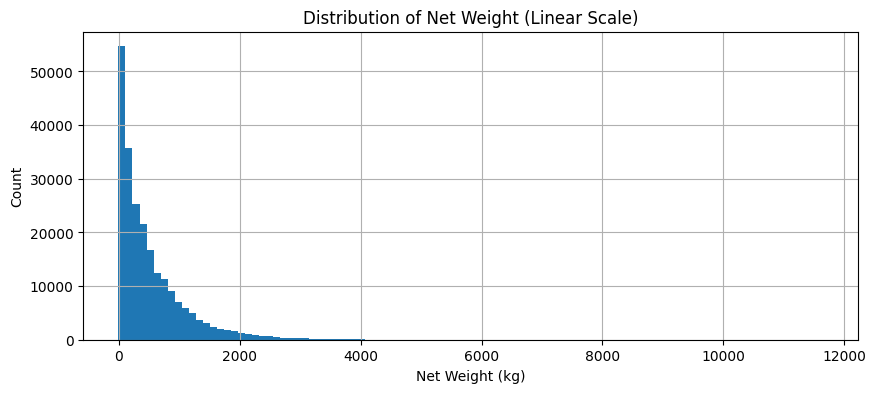

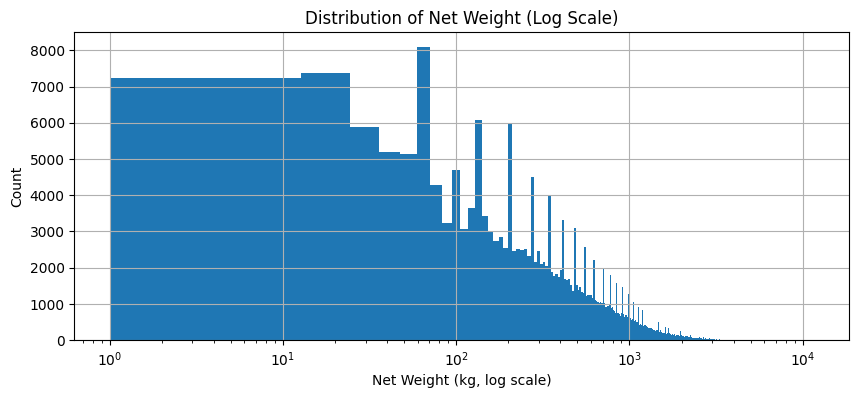

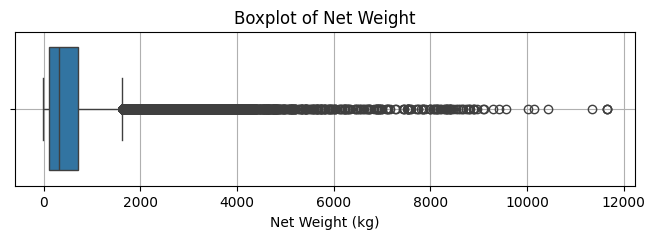


✅ Mean / Median / Count by Item Name (Top 10)


,mean,median,count
品名,,,
混合廃棄物A,585.565760,430.0,96145
混合廃棄物B,602.908356,450.0,23013
選別,456.839386,270.0,12969
その他,305.650329,50.0,11242
ＧＣ 軽鉄・スチ－ル類,668.508144,380.0,11174
木くず,471.693366,280.0,10612
混合廃棄物（焼却物）,359.069854,210.0,5397
GC 軽鉄･ｽﾁｰﾙ類,664.801619,410.0,3705
軽量物系 Ｂ,332.013221,180.0,3328



✅ Average Net Weight by Day of Week (0=Mon, 6=Sun)
weekday
0    519.619779
1    546.304318
2    534.164365
3    529.928744
4    521.246742
5    511.829874
6    433.100037
Name: 正味重量, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ① Detailed statistics
print("✅ Detailed statistics of 'Net Weight'")
print(df_filtered["正味重量"].describe(percentiles=[0.001, 0.01, 0.25, 0.5, 0.75, 0.99, 0.999]))

# ② Count of zero or negative weights
print("\n✅ Number of entries with net weight <= 0")
print((df_filtered["正味重量"] <= 0).sum())

# ③ Histogram (linear scale)
plt.figure(figsize=(10, 4))
df_filtered["正味重量"].hist(bins=100)
plt.title("Distribution of Net Weight (Linear Scale)")
plt.xlabel("Net Weight (kg)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# ④ Histogram (log scale)
plt.figure(figsize=(10, 4))
df_filtered[df_filtered["正味重量"] > 0]["正味重量"].hist(bins=1000)
plt.xscale('log')
plt.title("Distribution of Net Weight (Log Scale)")
plt.xlabel("Net Weight (kg, log scale)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# ⑤ Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_filtered["正味重量"])
plt.title("Boxplot of Net Weight")
plt.xlabel("Net Weight (kg)")
plt.grid(True)
plt.show()

# ⑥ Mean/Median by Item Name
print("\n✅ Mean / Median / Count by Item Name (Top 10)")
agg_stats = df_filtered.groupby("品名")["正味重量"].agg(["mean", "median", "count"])
display(agg_stats.sort_values("count", ascending=False).head(10))

# ⑦ Mean by Day of Week
df_filtered["weekday"] = df_filtered["伝票日付"].dt.dayofweek
print("\n✅ Average Net Weight by Day of Week (0=Mon, 6=Sun)")
print(df_filtered.groupby("weekday")["正味重量"].mean())


✅ Number of negative net weight values: 1

✅ Net weight counts by 10kg bins (0–500kg):


weight_bin
0-9kg        3537
10-19kg      7243
20-29kg      7375
30-39kg      5876
40-49kg      5189
50-59kg      5135
60-69kg      4725
70-79kg      3372
80-89kg      4288
90-99kg      3230
100-109kg    4701
110-119kg    3080
120-129kg    3651
130-139kg    3009
140-149kg    3070
150-159kg    3426
160-169kg    2974
170-179kg    2728
180-189kg    2856
190-199kg    2554
200-209kg    3404
210-219kg    2578
220-229kg    2472
230-239kg    2508
240-249kg    2491
250-259kg    2527
260-269kg    2334
270-279kg    2195
280-289kg    2309
290-299kg    2168
300-309kg    2467
310-319kg    2095
320-329kg    2170
330-339kg    2048
340-349kg    1937
350-359kg    2038
360-369kg    1876
370-379kg    1772
380-389kg    1833
390-399kg    1751
400-409kg    1922
410-419kg    1607
420-429kg    1722
430-439kg    1676
440-449kg    1650
450-459kg    1697
460-469kg    1530
470-479kg    1364
480-489kg    1623
490-499kg    1470
Name: count, dtype: int64

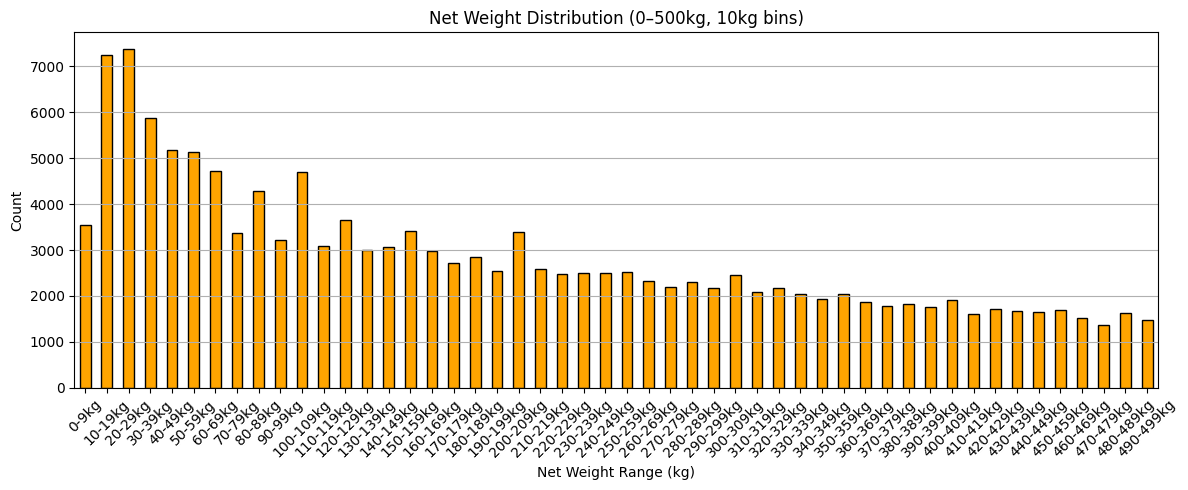

In [6]:
import numpy as np
import pandas as pd

# ① 正味重量が負の件数
negative_count = (df_filtered["正味重量"] < 0).sum()
print(f"✅ Number of negative net weight values: {negative_count}")

# ② ヒストグラムのビン定義（0〜500kgを10kg間隔で）
bins = np.arange(0, 510, 10)  # [0, 10), [10, 20), ..., [490, 500]

# pd.cutでビン分割して件数をカウント
bin_labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}kg" for i in range(len(bins)-1)]
df_filtered["weight_bin"] = pd.cut(df_filtered["正味重量"], bins=bins, right=False, labels=bin_labels)

# 件数の集計
bin_counts = df_filtered["weight_bin"].value_counts().sort_index()

# 結果表示
print("\n✅ Net weight counts by 10kg bins (0–500kg):")
display(bin_counts)

# オプション：棒グラフで表示
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
bin_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Net Weight Distribution (0–500kg, 10kg bins)")
plt.xlabel("Net Weight Range (kg)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


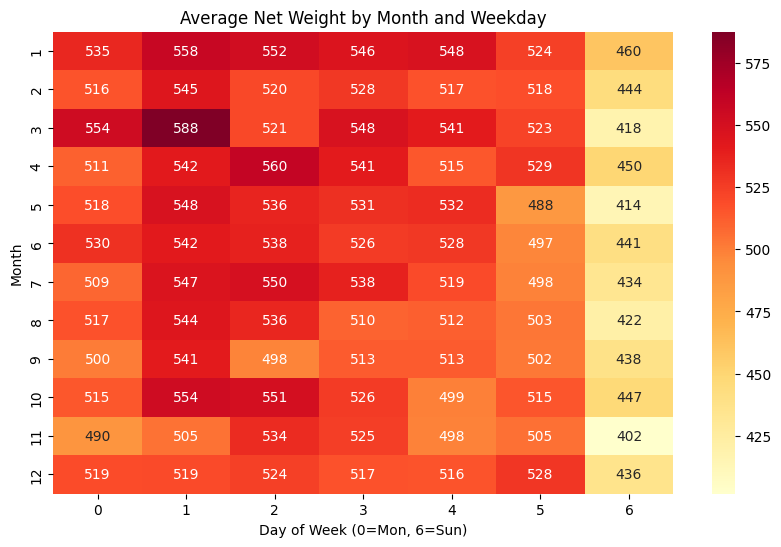

In [7]:
# Add month column
df_filtered["month"] = df_filtered["伝票日付"].dt.month

# Create pivot table
pivot = df_filtered.pivot_table(index="month", columns="weekday", values="正味重量", aggfunc="mean")

# Heatmap plot (YlOrRd colormap)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Average Net Weight by Month and Weekday")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Month")
plt.show()


### df_filtered

In [8]:
import pandas as pd

# --- ① 前提処理（必要に応じて事前に実行） ---
df_filtered["伝票日付"] = pd.to_datetime(df_filtered["伝票日付"], errors="coerce")
df_filtered["伝票日付"] = df_filtered["伝票日付"].dt.normalize()
df_filtered["weekday"] = df_filtered["伝票日付"].dt.dayofweek  # 0=Mon, 6=Sun
date_str = df_filtered["伝票日付"].dt.strftime("%Y-%m-%d")

# --- ② 祝日フラグの付与 ---
holiday = get_japanese_holidays("2020-1-1", "2025-12-31")  # list[str]
df_filtered["祝日フラグ"] = date_str.isin(holiday)

# --- ③ 件数ベースでの上下5%除外（1件ごとの正味重量） ---
low = df_filtered["正味重量"].quantile(0.05)
high = 4000  # 現場仕様：4トン車上限

df_filtered = df_filtered[
    (df_filtered["正味重量"] >= low) &
    (df_filtered["正味重量"] <= high)
].copy()

print(f"✅ After trimming extreme weights: {len(df_filtered)} rows")
print(f"   - Lower bound: {low:.2f} kg, Upper bound: 4000 kg")

# --- ④ 上位5%の高荷重日を除外（日別合計ベース） ---
daily_total = df_filtered.groupby("伝票日付")["正味重量"].sum()
upper_threshold = daily_total.quantile(0.95)

valid_dates = daily_total[daily_total <= upper_threshold].index
df_filtered = df_filtered[df_filtered["伝票日付"].isin(valid_dates)].copy()

print(f"✅ After removing top 5% daily totals: {len(df_filtered)} rows")
print(f"   - Upper daily total threshold: {upper_threshold:.2f} kg")

# --- ⑤ 平日・土曜 & 非祝日 の下位5%日を除外 ---
df_filtered["is_valid_day"] = (df_filtered["weekday"] != 6) & (~df_filtered["祝日フラグ"])

valid_daily_total = df_filtered[df_filtered["is_valid_day"]].groupby("伝票日付")["正味重量"].sum()
lower_threshold = valid_daily_total.quantile(0.05)

low_volume_dates = valid_daily_total[valid_daily_total < lower_threshold].index
df_filtered = df_filtered[~df_filtered["伝票日付"].isin(low_volume_dates)].copy()

print(f"✅ After removing bottom 5% of valid non-holiday, non-Sunday days: {len(df_filtered)} rows")
print(f"   - Lower daily total threshold: {lower_threshold:.2f} kg")


✅ After trimming extreme weights: 215664 rows
   - Lower bound: 20.00 kg, Upper bound: 4000 kg
✅ After removing top 5% daily totals: 198941 rows
   - Upper daily total threshold: 111164.00 kg
✅ After removing bottom 5% of valid non-holiday, non-Sunday days: 192606 rows
   - Lower daily total threshold: 63537.00 kg


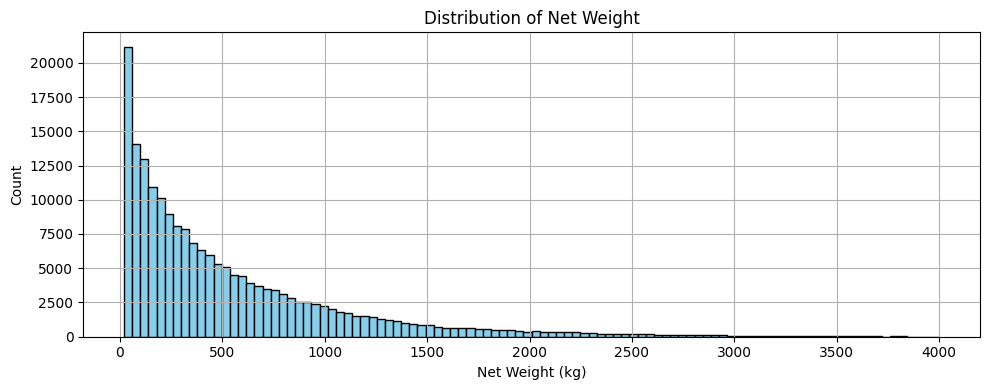

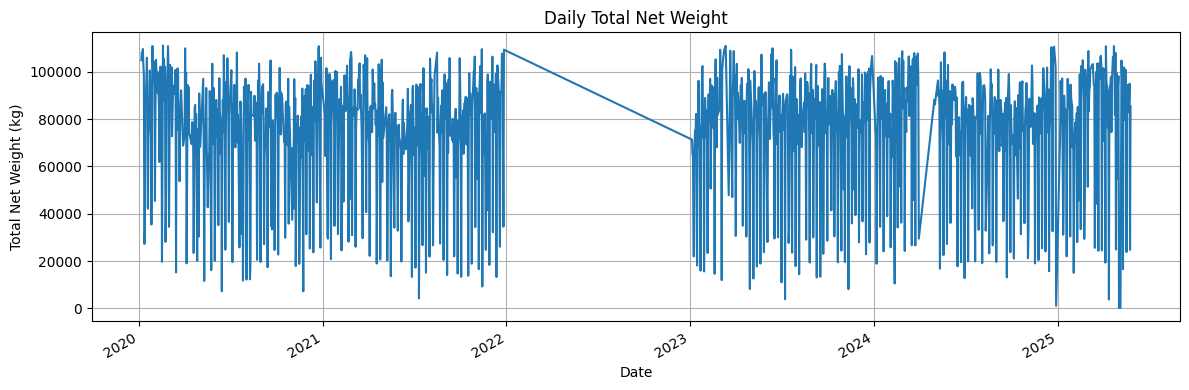

/tmp/ipykernel_90704/1916585769.py:48: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_90704/1916585769.py:48: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_90704/1916585769.py:48: UserWarning: Glyph 24259 (\N{CJK UNIFIED IDEOGRAPH-5EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_90704/1916585769.py:48: UserWarning: Glyph 26820 (\N{CJK UNIFIED IDEOGRAPH-68C4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_90704/1916585769.py:48: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_90704/1916585769.py:48: UserWarning: Glyph 12381 (\N{HIRAGANA LETTER SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_90704/1916585769.py:48: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing

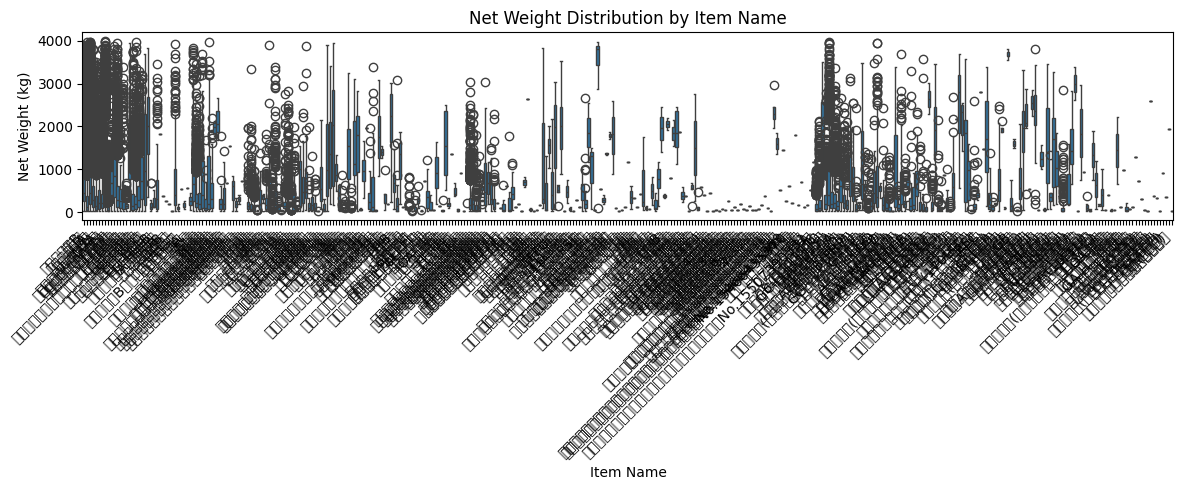

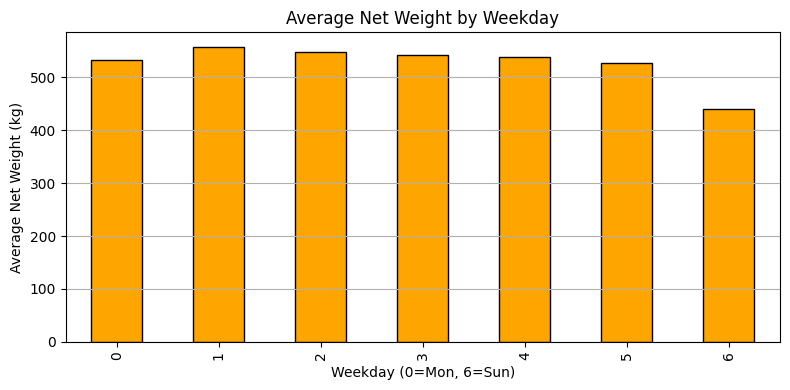

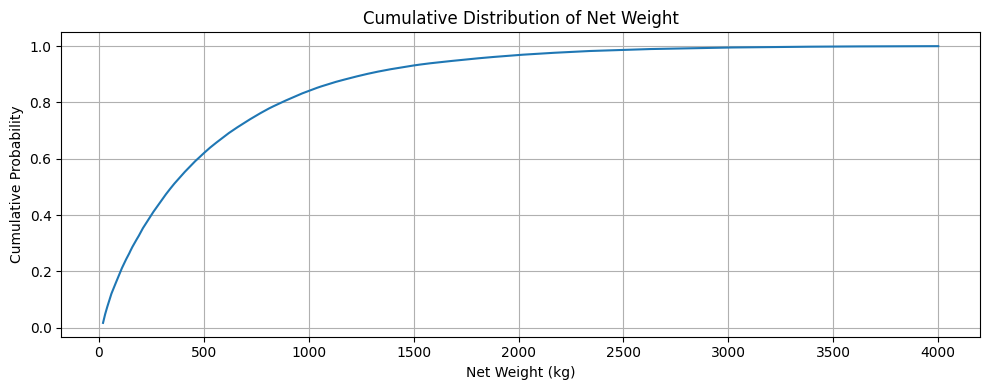

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 前処理 ---
df_filtered["伝票日付"] = pd.to_datetime(df_filtered["伝票日付"], errors="coerce")
df_filtered["weekday"] = df_filtered["伝票日付"].dt.dayofweek  # 0=Mon
df_filtered["month"] = df_filtered["伝票日付"].dt.month

# 描画スタイル
plt.style.use("default")

# =========================================
# ① Histogram of Net Weight
# =========================================
plt.figure(figsize=(10, 4))
df_filtered["正味重量"].hist(bins=100, color="skyblue", edgecolor="black")
plt.title("Distribution of Net Weight")
plt.xlabel("Net Weight (kg)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================
# ② Daily Total Net Weight (Line Plot)
# =========================================
daily_sum = df_filtered.groupby("伝票日付")["正味重量"].sum()

plt.figure(figsize=(12, 4))
daily_sum.plot()
plt.title("Daily Total Net Weight")
plt.xlabel("Date")
plt.ylabel("Total Net Weight (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================
# ③ Boxplot by Item Name
# =========================================
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_filtered, x="品名", y="正味重量")
plt.title("Net Weight Distribution by Item Name")
plt.xlabel("Item Name")
plt.ylabel("Net Weight (kg)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# =========================================
# ④ Bar Chart by Weekday
# =========================================
weekday_avg = df_filtered.groupby("weekday")["正味重量"].mean()

plt.figure(figsize=(8, 4))
weekday_avg.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Net Weight by Weekday")
plt.xlabel("Weekday (0=Mon, 6=Sun)")
plt.ylabel("Average Net Weight (kg)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# =========================================
# ⑤ Cumulative Distribution Function (CDF)
# =========================================
sorted_weights = df_filtered["正味重量"].sort_values()
cdf = sorted_weights.rank(pct=True)

plt.figure(figsize=(10, 4))
plt.plot(sorted_weights.values, cdf.values)
plt.title("Cumulative Distribution of Net Weight")
plt.xlabel("Net Weight (kg)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


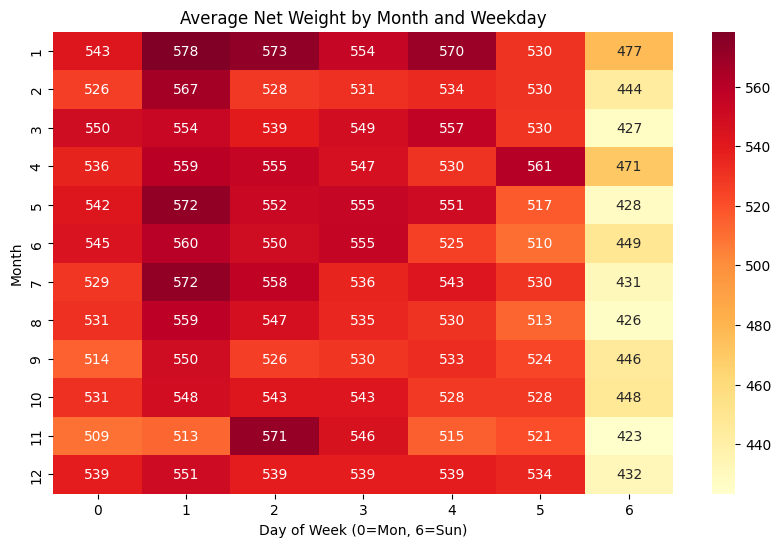

In [10]:
# Add month column
df_filtered["month"] = df_filtered["伝票日付"].dt.month

# Create pivot table
pivot = df_filtered.pivot_table(index="month", columns="weekday", values="正味重量", aggfunc="mean")

# Heatmap plot (YlOrRd colormap)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Average Net Weight by Month and Weekday")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Month")
plt.show()

In [11]:
daily_sum = df_filtered.groupby("伝票日付")["正味重量"].sum().sort_values(ascending=False)
daily_sum

伝票日付
2020-02-18    111150.0
2023-03-13    110970.0
2020-01-28    110930.0
2025-04-23    110900.0
2020-12-24    110860.0
                ...   
2025-04-13      3750.0
2024-12-29      1040.0
2025-05-03       230.0
2025-05-05       210.0
2025-05-06       170.0
Name: 正味重量, Length: 1360, dtype: float64

### 天気追加

In [12]:
import requests
import pandas as pd

def get_tokyo_weather_history(start_date: str, end_date: str) -> pd.DataFrame:
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude":35.645213,
        "longitude": 139.838695,
        "start_date": start_date,
        "end_date": end_date,
        "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"],
        "timezone": "Asia/Tokyo"
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data["daily"])
        df["time"] = pd.to_datetime(df["time"])
        return df
    else:
        print("❌ Failed to fetch data:", response.text)
        return pd.DataFrame()
# 取得
df_weather = get_tokyo_weather_history("2020-01-01", "2025-06-01")


In [13]:
def classify_weather(row):
    if row["precipitation_sum"] == 0.0:
        return "clear"
    elif row["precipitation_sum"] <= 1.0:
        return "light rain"
    elif row["precipitation_sum"] <= 10.0:
        return "rain"
    else:
        return "heavy rain"

df_weather["weather_label"] = df_weather.apply(classify_weather, axis=1)


In [14]:
print(df_weather.columns)

Index(['time', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum',
       'weather_label'],
      dtype='object')


In [15]:
# ② 日付をdatetime型に変換（念のため）
df_weather["time"] = pd.to_datetime(df_weather["time"])


# ③ 天気データのカラム名を明確に（カラム重複防止のため）
df_weather.rename(columns={
    "time": "伝票日付",
    "temperature_2m_max": "最高気温",
    "temperature_2m_min": "最低気温",
    "precipitation_sum": "降水量"
}, inplace=True)


df_weather["伝票日付"] = pd.to_datetime(df_weather["伝票日付"]).dt.normalize()

# ① df_filtered の日付を日単位に揃える（normalize）
df_filtered["伝票日付"] = pd.to_datetime(df_filtered["伝票日付"]).dt.normalize()

# ② df_weather の列名変更 + normalize
df_weather.rename(columns={"time": "伝票日付"}, inplace=True)
df_weather["伝票日付"] = pd.to_datetime(df_weather["伝票日付"]).dt.normalize()

# ③ LEFT JOIN でマージ（元の df_filtered を保持）
df_merged = pd.merge(df_filtered, df_weather, on="伝票日付", how="left")


In [16]:
# ④ 確認
print("✅ マージ結果の列一覧:", df_merged.columns.tolist())

✅ マージ結果の列一覧: ['伝票日付', '正味重量', '品名', 'weekday', 'weight_bin', 'month', '祝日フラグ', 'is_valid_day', '最高気温', '最低気温', '降水量', 'weather_label']


In [17]:
# 日ごとに正味重量を合計
# 日ごとに集約（1日1行）
df_daily = df_merged.groupby("伝票日付").agg({
    "正味重量": "sum",           # 日ごとの総正味重量
    "降水量": "mean",           # 同じ日であれば1つに決まるが、一応mean
    "最高気温": "mean",         # 天気データからの代表値
    "最低気温": "mean",
    "is_valid_day": "first",    # 同じ日であれば同一なので、firstで十分
    "weekday": "first",
    "weight_bin": "first",
    "month": "first",
    "祝日フラグ": "first",
    # "weather_label": "first"    # 分類された天気
}).reset_index()

# 非営業日データ
df_invalid = df_daily[df_daily["is_valid_day"] == False].copy()

# 上位5%のしきい値を算出
upper_threshold = df_invalid["正味重量"].quantile(0.95)

# 外れ値除外（95%以下のみ残す）
df_invalid = df_invalid[df_invalid["正味重量"] <= upper_threshold]

print(f"✅ 非営業日の外れ値除去後：{len(df_invalid)} 件（上限 {upper_threshold:.0f} kg）")


# 営業日だけ抽出
df_valid = df_daily[df_daily["is_valid_day"] == True].copy()

# 非営業日の外れ値除去済データと統合
df_daily = pd.concat([df_valid, df_invalid], ignore_index=True)

df_daily=df_daily["伝票日付","正味重量","品名"]

✅ 非営業日の外れ値除去後：229 件（上限 56400 kg）


KeyError: ('伝票日付', '正味重量', '品名')

/tmp/ipykernel_22294/4241751573.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([valid_weights, invalid_weights], labels=["営業日", "非営業日"])
/tmp/ipykernel_22294/4241751573.py:13: UserWarning: Glyph 21942 (\N{CJK UNIFIED IDEOGRAPH-55B6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/4241751573.py:13: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/4241751573.py:13: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/4241751573.py:13: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/4241751573.py:13: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) Dej

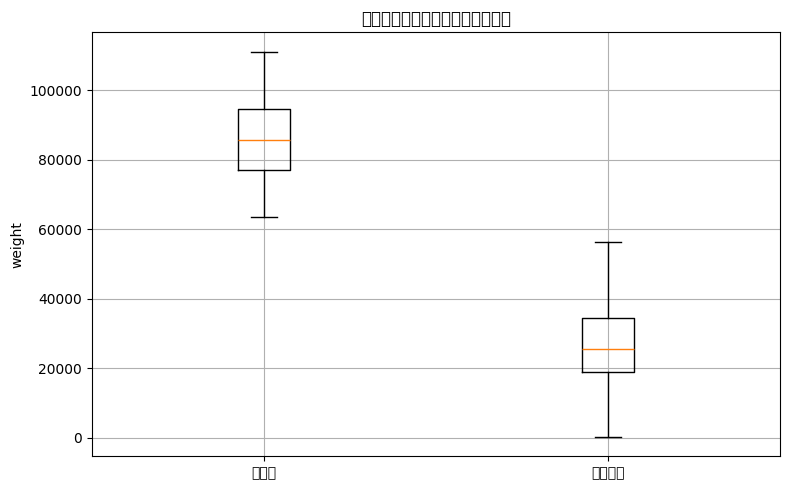

In [ ]:
import matplotlib.pyplot as plt

# データ準備
valid_weights = df_daily[df_daily["is_valid_day"] == True]["正味重量"]
invalid_weights = df_daily[df_daily["is_valid_day"] == False]["正味重量"]

# グラフ描画
plt.figure(figsize=(8, 5))
plt.boxplot([valid_weights, invalid_weights], labels=["営業日", "非営業日"])
plt.ylabel("weight")
plt.title("営業日と非営業日の正味重量分布")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21619 (\N{CJK UNIFIED IDEOGRAPH-5473}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas

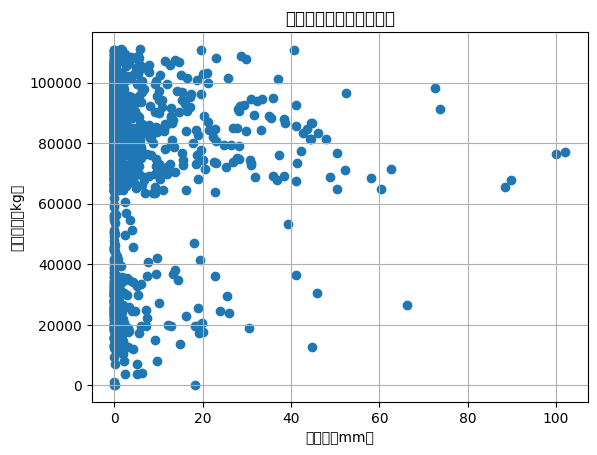

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_daily["降水量"], df_daily["正味重量"])
plt.xlabel("降水量（mm）")
plt.ylabel("正味重量（kg）")
plt.title("降水量と正味重量の関係")
plt.grid(True)
plt.show()

In [521]:
def classify_weather(rain: float) -> str:
    if rain <= 1.0:
        return "晴れ"
    elif rain <=5.0:
        return "小雨"
    elif rain <= 10.0:
        return "雨"
    elif rain <= 20.0:
        return "大雨"
    else:
        return "台風級"


df_daily["天気"] = df_daily["降水量"].apply(classify_weather)
df_valid = df_daily[df_daily["is_valid_day"] == True]

df_daily.groupby("天気")["降水量"].describe()



,count,mean,std,min,25%,50%,75%,max
天気,,,,,,,,
台風級,85.0,38.490588,17.388931,20.3,26.90,33.30,44.300,102.1
大雨,76.0,14.881579,3.151791,10.1,12.15,14.65,18.125,20.0
小雨,240.0,2.527083,1.086844,1.1,1.60,2.30,3.300,5.0
晴れ,861.0,0.118351,0.245352,0.0,0.00,0.00,0.100,1.0
雨,86.0,7.096512,1.590667,5.1,5.70,6.60,8.600,10.0


In [419]:
from scipy.stats import ttest_ind

# 台風級 vs 非台風級のデータに分ける
taifu = df_valid[df_valid["天気"] == "台風級"]["正味重量"]
other = df_valid[df_valid["天気"] != "台風級"]["正味重量"]

# Welchのt検定（等分散でない前提）
t_stat, p_value = ttest_ind(taifu, other, equal_var=False)

print(f"t値: {t_stat:.3f}, p値: {p_value:.5f}")


t値: -2.141, p値: 0.03512


In [522]:
df_daily.head()

,伝票日付,正味重量,降水量,最高気温,最低気温,is_valid_day,weekday,weight_bin,month,祝日フラグ,is_typhoon,天気
0,2020-01-06,104910.0,0.0,10.7,2.2,True,0,470-479kg,1,False,False,晴れ
1,2020-01-07,108180.0,4.3,8.0,2.7,True,1,120-129kg,1,False,False,小雨
2,2020-01-08,105990.0,12.6,7.1,3.4,True,2,390-399kg,1,False,False,大雨
3,2020-01-09,109640.0,0.1,13.4,4.6,True,3,220-229kg,1,False,False,晴れ
4,2020-01-10,102960.0,1.0,10.6,4.1,True,4,340-349kg,1,False,False,晴れ


In [523]:
# df_daily["is_typhoon"]= df_daily["降水量"] >= 30
df_selected = df_daily[["伝票日付", "正味重量","is_typhoon", "祝日フラグ", "weekday", "month", "最高気温", "最低気温","降水量","天気"]].copy()
df_selected

,伝票日付,正味重量,is_typhoon,祝日フラグ,weekday,month,最高気温,最低気温,降水量,天気
0,2020-01-06,104910.0,False,False,0,1,10.7,2.2,0.0,晴れ
1,2020-01-07,108180.0,False,False,1,1,8.0,2.7,4.3,小雨
2,2020-01-08,105990.0,False,False,2,1,7.1,3.4,12.6,大雨
3,2020-01-09,109640.0,False,False,3,1,13.4,4.6,0.1,晴れ
4,2020-01-10,102960.0,False,False,4,1,10.6,4.1,1.0,晴れ
...,...,...,...,...,...,...,...,...,...,...
1343,2025-05-05,210.0,False,True,0,5,20.7,12.9,0.1,晴れ
1344,2025-05-06,170.0,False,True,1,5,17.1,13.9,18.2,大雨
1345,2025-05-11,16560.0,False,False,6,5,24.2,16.3,1.8,小雨
1346,2025-05-18,23800.0,False,False,6,5,25.9,21.8,0.1,晴れ


## 学習

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

y = df_selected["正味重量"]
X = df_selected[["weekday", "month", "降水量", "最高気温", "最低気温", "祝日フラグ", "is_typhoon"]]

model = RandomForestRegressor()
model.fit(X, y)

y_pred = model.predict(X)
print("R²:", r2_score(y, y_pred))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R²（テストデータ）:", r2_score(y_test, y_pred))


NameError: name 'df_selected' is not defined

In [ ]:

# 特徴量の重要度を取得
importances = model.feature_importances_
features = X.columns

# データフレームにまとめて降順に並べる
importance_df = pd.DataFrame({
    "特徴量": features,
    "重要度": importances
}).sort_values(by="重要度", ascending=False)

print(importance_df)

# プロット（視覚的にわかりやすく）
plt.figure(figsize=(8, 4))
plt.barh(importance_df["特徴量"], importance_df["重要度"])
plt.xlabel("重要度")
plt.ylabel("特徴量")
plt.title("特徴量の重要度")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [556]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'IPAexGothic' not found.
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2

✅ 選ばれた特徴量: ['month', '前日重量', 'weekday_1', 'weekday_5', 'weekday_6', '天気_小雨', '天気_晴れ']


/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 21066 (\N{CJK UNIFIED IDEOGRAPH-524A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 28187 (\N{CJK UNIFIED IDEOGRAPH-6E1B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:45: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}

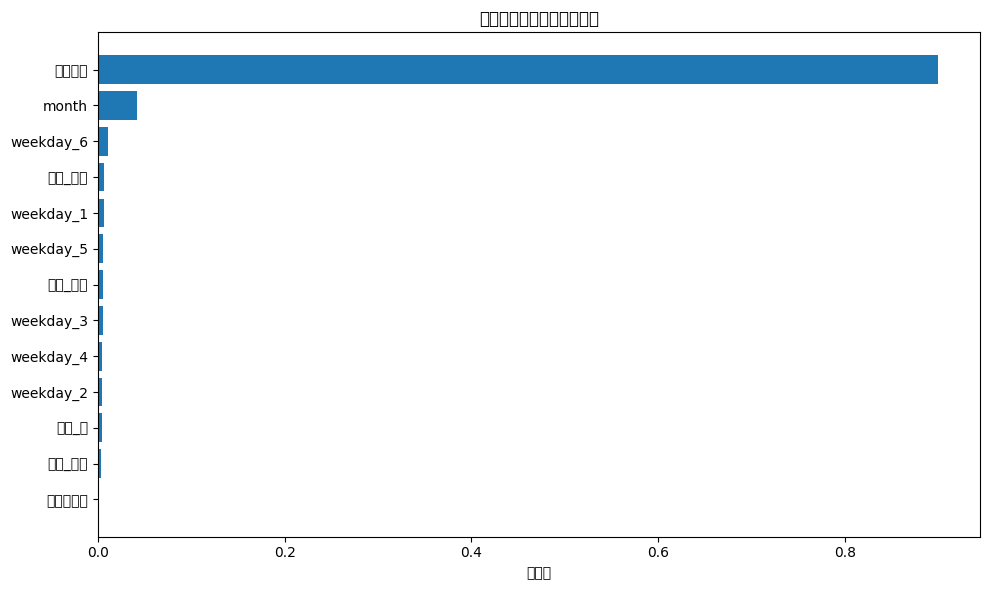

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/tmp/ipykernel_22294/3549695104.py:70: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:70: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/3549695104.py:70: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'IPAexGothic' not found.
/tmp/ipykernel_22294/3549695104.py:70: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) Dej

🎯 R²（訓練データ）: 0.9714772666720662
🧪 R²（テストデータ）: 0.7916374156555404


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

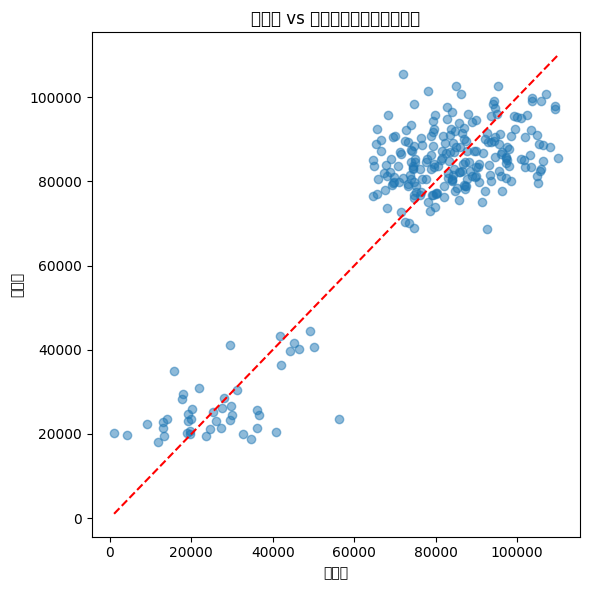

✅ モデルを保存しました → rf_model_selected.joblib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib

# === 特徴量と目的変数の準備 ===
df_selected["前日重量"] = df_selected["正味重量"].shift(1)
X = df_selected[["weekday", "month", "祝日フラグ","天気", "前日重量"]].copy()
y = df_selected["正味重量"]

# === One-Hot Encoding（weekday, 天気） ===
X_encoded = pd.get_dummies(X, columns=["weekday", "天気"], drop_first=True)

# === データ分割 ===
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# === ランダムフォレストで基礎モデル学習 ===
base_model = RandomForestRegressor(random_state=42)
base_model.fit(X_train, y_train)

# === 特徴量選択 ===
selector = SelectFromModel(base_model, threshold="median")  # 中央値以上を採用
selector.fit(X_train, y_train)
selected_features = X_encoded.columns[selector.get_support()]
print("✅ 選ばれた特徴量:", selected_features.tolist())

# === 特徴量の重要度をプロット（削減前） ===
importances = base_model.feature_importances_
features = X_encoded.columns
importance_df = pd.DataFrame({
    "特徴量": features,
    "重要度": importances
}).sort_values(by="重要度", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["特徴量"], importance_df["重要度"])
plt.xlabel("重要度")
plt.title("特徴量の重要度（削減前）")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === 特徴量選択後のデータに変換 ===
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# === 再学習 ===
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)

# === 評価（R²スコア） ===
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

print("🎯 R²（訓練データ）:", r2_score(y_train, y_train_pred))
print("🧪 R²（テストデータ）:", r2_score(y_test, y_test_pred))

# === 散布図：予測値 vs 実測値 ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("実測値")
plt.ylabel("予測値")
plt.title("予測値 vs 実測値（テストデータ）")
plt.tight_layout()
plt.show()

# === モデル保存（任意） ===
joblib.dump(model, "rf_model_selected.joblib")
print("✅ モデルを保存しました → rf_model_selected.joblib")


✅ 選ばれた特徴量: ['month', '祝日フラグ', '前日重量', '前週平均', '前日比', 'weekday_6', '天気_小雨', '天気_晴れ']


/tmp/ipykernel_22294/1220666642.py:50: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:50: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:50: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:50: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:50: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:50: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:50: UserWarning: Glyph 36913 (\N{CJK UNIFIED IDEOGRAP

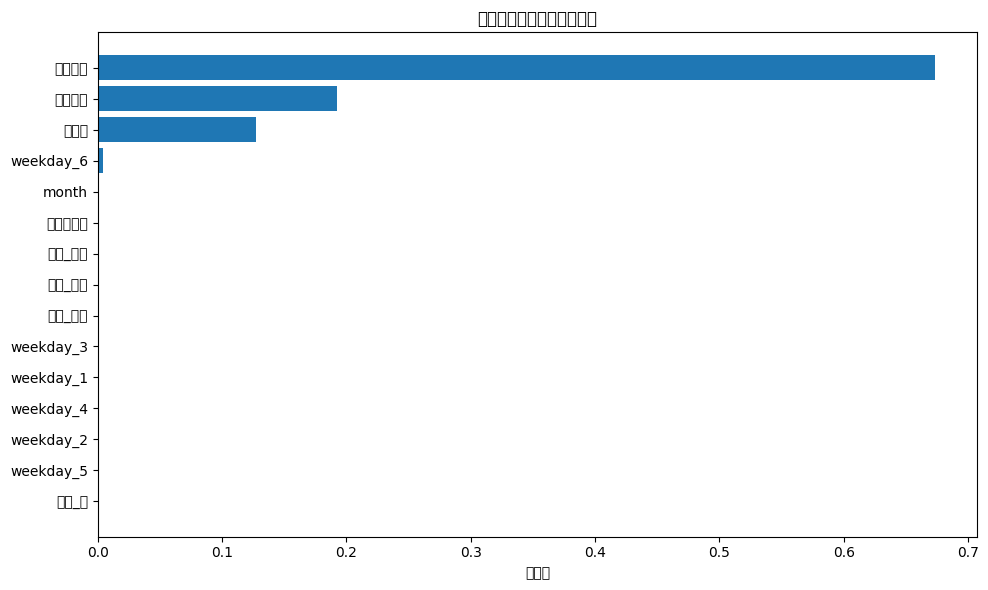

🎯 R²（訓練データ）: 0.9989125437895989
🧪 R²（テストデータ）: 0.9849186382058164


/tmp/ipykernel_22294/1220666642.py:75: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:75: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:75: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:75: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:75: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:75: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_22294/1220666642.py:75: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing

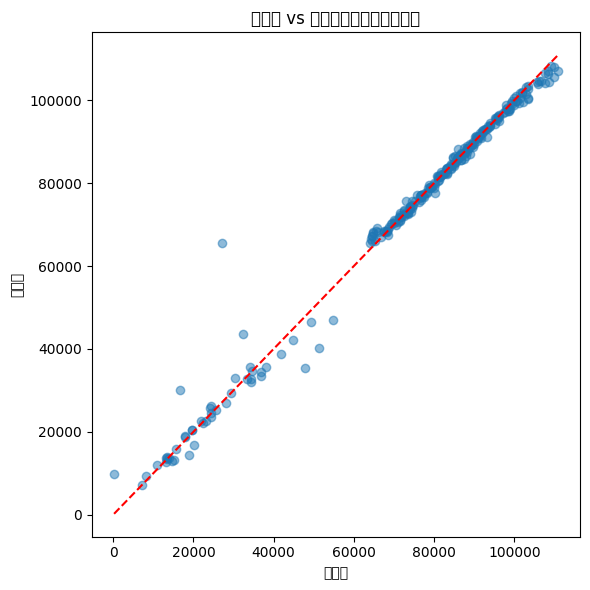

✅ モデルを保存しました → rf_model_selected_v2.joblib


In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib

# === 特徴量生成 ===
df_selected["前日重量"] = df_selected["正味重量"].shift(1)
df_selected["前週平均"] = df_selected["正味重量"].shift(1).rolling(window=7).mean()
df_selected["前日比"] = df_selected["正味重量"] / df_selected["前日重量"]
df_selected = df_selected.replace([np.inf, -np.inf], np.nan).dropna()

# === 説明変数・目的変数 ===
X = df_selected[["weekday", "month", "祝日フラグ", "天気", "前日重量", "前週平均", "前日比"]].copy()
y = df_selected["正味重量"]

# === One-Hot Encoding（weekday, 天気） ===
X_encoded = pd.get_dummies(X, columns=["weekday", "天気"], drop_first=True)

# === データ分割 ===
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# === 特徴量選択 ===
base_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
base_model.fit(X_train, y_train)

selector = SelectFromModel(base_model, threshold="median")
selector.fit(X_train, y_train)
selected_features = X_encoded.columns[selector.get_support()]
print("✅ 選ばれた特徴量:", selected_features.tolist())

# === 特徴量重要度のプロット ===
importances = base_model.feature_importances_
features = X_encoded.columns
importance_df = pd.DataFrame({
    "特徴量": features,
    "重要度": importances
}).sort_values(by="重要度", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["特徴量"], importance_df["重要度"])
plt.xlabel("重要度")
plt.title("特徴量の重要度（削減前）")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === 特徴量選択後のデータに変換 ===
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# === 再学習（本番用モデル） ===
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_selected, y_train)

# === 評価（R²スコア） ===
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

print("🎯 R²（訓練データ）:", r2_score(y_train, y_train_pred))
print("🧪 R²（テストデータ）:", r2_score(y_test, y_test_pred))

# === 散布図：予測 vs 実測 ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("実測値")
plt.ylabel("予測値")
plt.title("予測値 vs 実測値（テストデータ）")
plt.tight_layout()
plt.show()

# === モデル保存 ===
joblib.dump(model, "rf_model_selected_v2.joblib")
print("✅ モデルを保存しました → rf_model_selected_v2.joblib")


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd

# === 特徴量生成（すでに作成済前提） ===
df_selected["前日重量"] = df_selected["正味重量"].shift(1)
df_selected["前週平均"] = df_selected["正味重量"].shift(1).rolling(window=7).mean()
df_selected["前日との差"] = df_selected["前日重量"] - df_selected["前週平均"]
df_selected = df_selected.replace([np.inf, -np.inf], np.nan).dropna()
df_selected = df_selected.sort_index()

X = df_selected[["weekday", "month", "祝日フラグ", "天気", "前日重量", "前週平均", "前日との差"]].copy()
y = df_selected["正味重量"]
X_encoded = pd.get_dummies(X, columns=["weekday", "天気"], drop_first=True)

# === TimeSeriesSplit による検証 ===
tscv = TimeSeriesSplit(n_splits=5)
r2_scores = []

for fold, (train_index, test_index) in enumerate(tscv.split(X_encoded)):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 特徴量選択
    selector = SelectFromModel(RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42), threshold="median")
    selector.fit(X_train, y_train)
    X_train_sel = selector.transform(X_train)
    X_test_sel = selector.transform(X_test)

    # モデル学習
    model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    model.fit(X_train_sel, y_train)

    # 評価
    y_pred = model.predict(X_test_sel)
    score = r2_score(y_test, y_pred)
    print(f"📦 Fold {fold+1} R²: {score:.4f}")
    r2_scores.append(score)

print("\n📈 平均R²スコア（TimeSeriesSplit）:", np.round(np.mean(r2_scores), 4))


📦 Fold 1 R²: 0.0228
📦 Fold 2 R²: -0.1815
📦 Fold 3 R²: 0.0257
📦 Fold 4 R²: 0.1237
📦 Fold 5 R²: -0.1602

📈 平均R²スコア（TimeSeriesSplit）: -0.0339


In [541]:
print(df_selected["伝票日付"] if "伝票日付" in df_selected.columns else df_selected.index)


29     2020-02-14
30     2020-02-15
31     2020-02-17
32     2020-02-18
33     2020-02-19
          ...    
1343   2025-05-05
1344   2025-05-06
1345   2025-05-11
1346   2025-05-18
1347   2025-05-25
Name: 伝票日付, Length: 1319, dtype: datetime64[ns]
